In [2]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

98.0%

102.8%


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



112.7%

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x2B18EC0D4C0>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

The statement %matplotlib inline indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with % are called magic commands and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Let's look at a couple of images from the dataset.


Label: 5


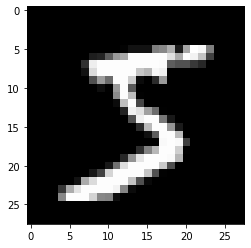

In [9]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


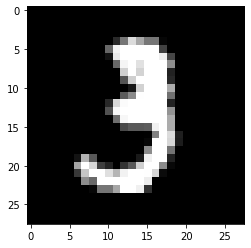

In [10]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [11]:
import torchvision.transforms as transforms

In [12]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [13]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


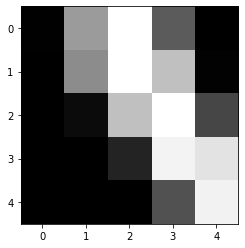

In [15]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

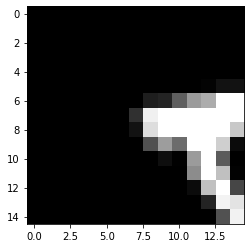

In [16]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,0:15,0:15], cmap='gray');

## Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [19]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0217,  0.0284,  0.0350,  ...,  0.0097, -0.0190,  0.0067],
        [ 0.0278, -0.0003, -0.0166,  ..., -0.0274, -0.0003,  0.0109],
        [ 0.0132, -0.0216, -0.0069,  ...,  0.0320, -0.0082,  0.0021],
        ...,
        [-0.0211,  0.0162,  0.0166,  ..., -0.0020, -0.0259,  0.0241],
        [ 0.0342,  0.0295,  0.0154,  ...,  0.0074,  0.0325, -0.0206],
        [-0.0303,  0.0337,  0.0078,  ...,  0.0078, -0.0064,  0.0061]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0316,  0.0182,  0.0102, -0.0273, -0.0122, -0.0025, -0.0221, -0.0012,
        -0.0324,  0.0044], requires_grad=True)

In [22]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([9, 4, 2, 7, 3, 8, 5, 2, 7, 9, 4, 7, 9, 2, 8, 9, 0, 8, 7, 7, 5, 1, 0, 4,
        6, 9, 5, 1, 1, 7, 3, 2, 2, 0, 3, 6, 2, 6, 5, 2, 9, 4, 1, 6, 3, 9, 9, 4,
        2, 4, 0, 1, 4, 1, 1, 5, 4, 8, 3, 3, 3, 3, 7, 3, 4, 5, 3, 5, 2, 2, 8, 0,
        2, 5, 2, 3, 0, 4, 8, 9, 5, 0, 2, 2, 2, 7, 2, 1, 4, 2, 0, 4, 4, 5, 8, 3,
        1, 3, 5, 6, 8, 5, 4, 1, 8, 9, 7, 4, 8, 8, 9, 7, 0, 8, 3, 5, 9, 3, 0, 1,
        1, 9, 9, 3, 2, 9, 3, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [23]:
images.shape

torch.Size([128, 1, 28, 28])

In [24]:
images.reshape(128, 784).shape

torch.Size([128, 784])